In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Tính toán Cramer's V giữa hai biến phân loại.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Giả sử bạn đã có DataFrame df chứa dữ liệu phim
df = pd.read_csv("clean_data.csv")  # Đọc dữ liệu từ file CSV
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB


In [18]:
# Chỉ lấy top 20 thể loại phổ biến nhất
top_genres = df["genres"].str.split(", ").explode().value_counts().nlargest(20).index
df["genres"] = df["genres"].apply(lambda x: next((g for g in x.split(", ") if g in top_genres), "Other"))
top_genres

Index(['Comedy', 'Action', 'Drama', 'Adventure', 'Crime', 'Period Drama',
       'Biography', 'Reality TV', 'Documentary', 'Other', 'Talk Show',
       'Animation', 'Horror', 'Family', 'Music', 'Fantasy', 'Mystery',
       'Romance', 'Thriller', 'Sci-Fi'],
      dtype='object', name='genres')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB


In [29]:
# Chỉ lấy top 10 quốc gia phổ biến nhất
top_countries = df["countries"].value_counts().nlargest(10).index
df["countries"] = df["countries"].apply(lambda x: x if x in top_countries else "Other")
top_countries


Index(['United States', 'Other', 'United Kingdom',
       'United Kingdom, United States', 'United States, United Kingdom',
       'Japan', 'United States, Canada', 'Canada', 'Australia', 'South Korea'],
      dtype='object', name='countries')

In [30]:
# Tính Cramer's V cho các cặp đặc trưng phân loại
categorical_features = ["type", "countries", "genres"]
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))),
                                index=categorical_features, columns=categorical_features)



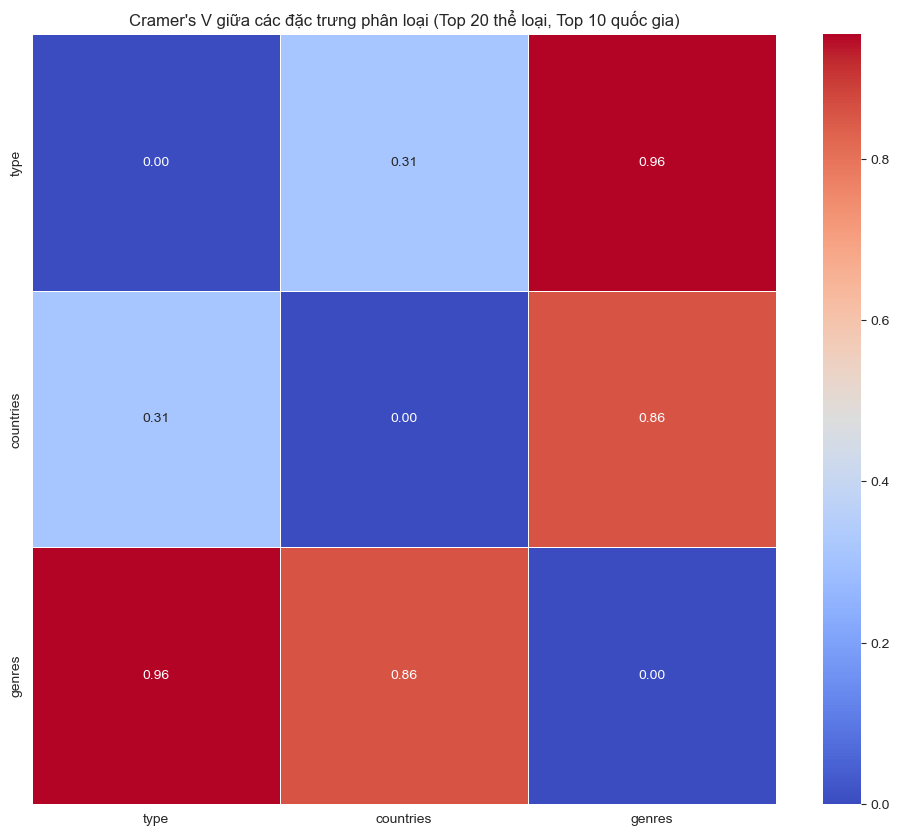

In [24]:
for i, col1 in enumerate(categorical_features):
    for j, col2 in enumerate(categorical_features):
        if i != j:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Vẽ heatmap để trực quan hóa mối quan hệ giữa các đặc trưng
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cramer's V giữa các đặc trưng phân loại (Top 20 thể loại, Top 10 quốc gia)")
plt.show()

In [32]:
# Giới hạn số thể loại phim hiển thị trong biểu đồ
n_display_genres = 10  # Chỉ hiển thị top 10 thể loại phổ biến nhất
popular_genres = df["genres"].value_counts().nlargest(n_display_genres).index
df_filtered = df[df["genres"].isin(popular_genres)]

<Figure size 1200x600 with 0 Axes>

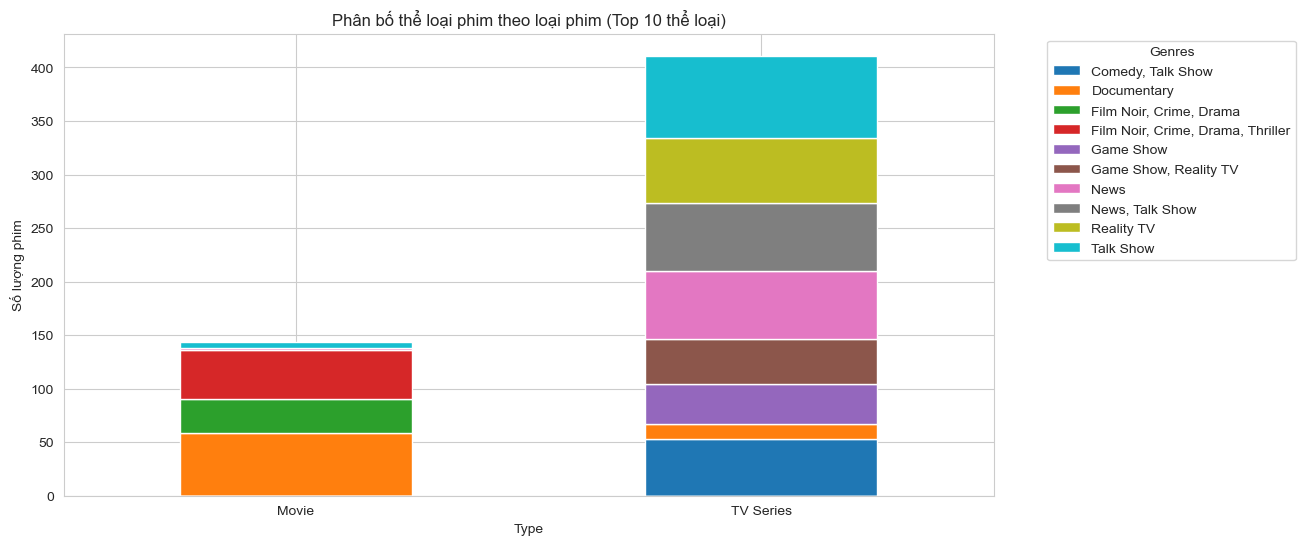

In [33]:
# Vẽ biểu đồ thể hiện mối quan hệ giữa type và genres
plt.figure(figsize=(12, 6))
type_genres_counts = pd.crosstab(df_filtered["type"], df_filtered["genres"])
type_genres_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Phân bố thể loại phim theo loại phim (Top 10 thể loại)")
plt.xlabel("Type")
plt.ylabel("Số lượng phim")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

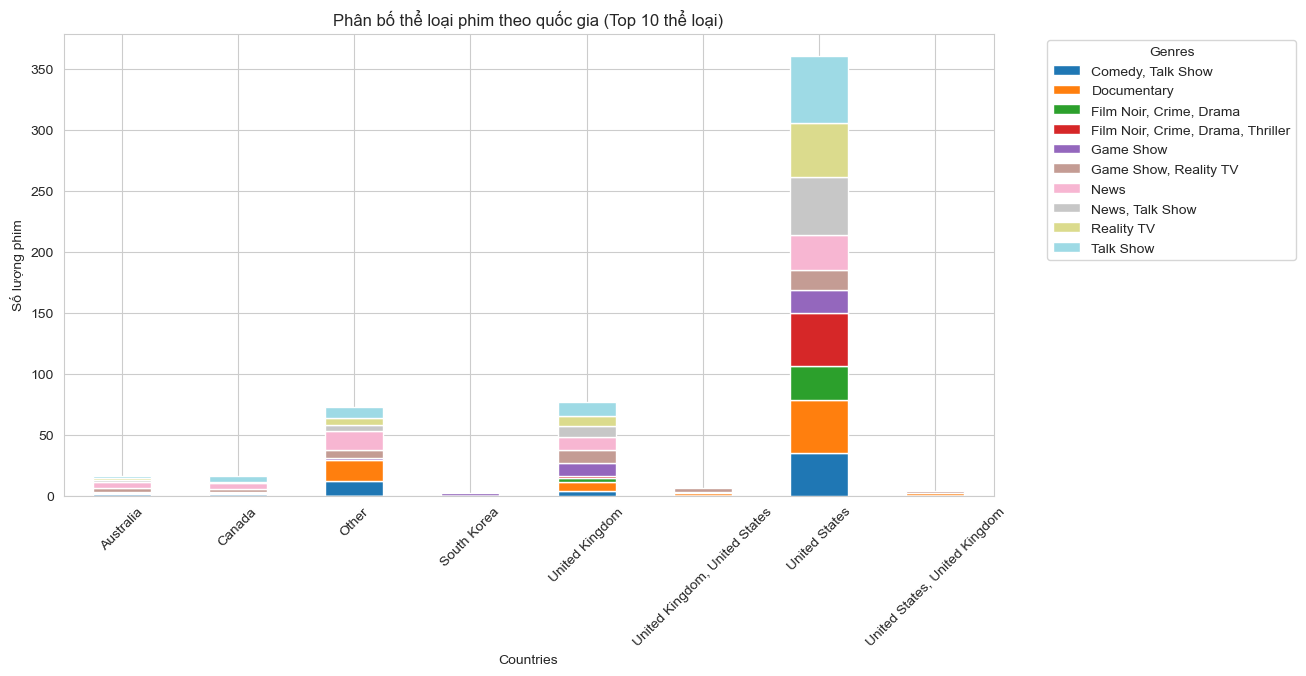

In [34]:
# Vẽ biểu đồ thể hiện mối quan hệ giữa countries và genres
plt.figure(figsize=(12, 6))
countries_genres_counts = pd.crosstab(df_filtered["countries"], df_filtered["genres"])
countries_genres_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab20")
plt.title("Phân bố thể loại phim theo quốc gia (Top 10 thể loại)")
plt.xlabel("Countries")
plt.ylabel("Số lượng phim")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()